In [11]:
import numpy as np

# 定义状态，按照零配件和半成品、成品编号
states = ['零配件1', '零配件2', '零配件3', '零配件4', '零配件5', '零配件6', '零配件7', '零配件8',
          '半成品1', '半成品2', '半成品3', '成品']

# 动作定义
actions = ['检测', '不检测', '装配', '销售', '拆解']

# 初始化奖励矩阵和状态转移概率矩阵
num_states = len(states)
num_actions = len(actions)
R = np.zeros((num_states, num_actions))
P = np.zeros((num_actions, num_states, num_states))

# 设置奖励矩阵和转移概率
# 零配件到半成品的转移
for i in range(3):  # 零配件1, 2, 3 转换到半成品1
    P[2, i, 8] = 0.9   # 装配成功概率为90%
    P[4, i, i] = 0.1   # 拆解失败概率为10%
    R[i, :] = [-1, -2, 10, 0, -5]  # 检测、不检测、装配、销售、拆解的奖励/惩罚

for i in range(3, 6):  # 零配件4, 5, 6 转换到半成品2
    P[2, i, 9] = 0.9
    P[4, i, i] = 0.1
    R[i, :] = [-1, -2, 10, 0, -5]

for i in range(6, 8):  # 零配件7, 8 转换到半成品3
    P[2, i, 10] = 0.9
    P[4, i, i] = 0.1
    R[i, :] = [-1, -2, 10, 0, -5]

# 半成品到成品的转移
for i in range(8, 11):
    P[3, i, 11] = 0.95  # 成品销售成功概率
    P[4, i, i] = 0.05   # 拆解失败概率
    R[i, :] = [-1, -2, 0, 50, -10]  # 成品不进行装配动作

# 成品销售奖励
R[11, :] = [0, 0, 0, 200, 0]  # 成品只有销售动作有意义

# 价值迭代求解最优策略
def value_iteration(P, R, gamma=0.95, epsilon=0.01):
    V = np.zeros(num_states)
    policy = np.zeros(num_states, dtype=int)
    while True:
        V_prev = np.copy(V)
        for s in range(num_states):
            Q = np.zeros(num_actions)
            for a in range(num_actions):
                Q[a] = R[s, a] + gamma * sum([P[a, s, sp] * V[sp] for sp in range(num_states)])
            V[s] = np.max(Q)
            policy[s] = np.argmax(Q)
        if np.max(np.abs(V - V_prev)) < epsilon:
            break
    return policy, V

policy, V = value_iteration(P, R)
print("最优策略:", [actions[p] for p in policy])  # 输出具体的动作名称
print("状态值函数:", V)


最优策略: ['装配', '装配', '装配', '装配', '装配', '装配', '装配', '装配', '销售', '销售', '销售', '销售']
状态值函数: [207.0775 207.0775 207.0775 207.0775 207.0775 207.0775 207.0775 207.0775
 230.5    230.5    230.5    200.    ]


In [5]:
import matplotlib

# 设置matplotlib以支持中文字体显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题


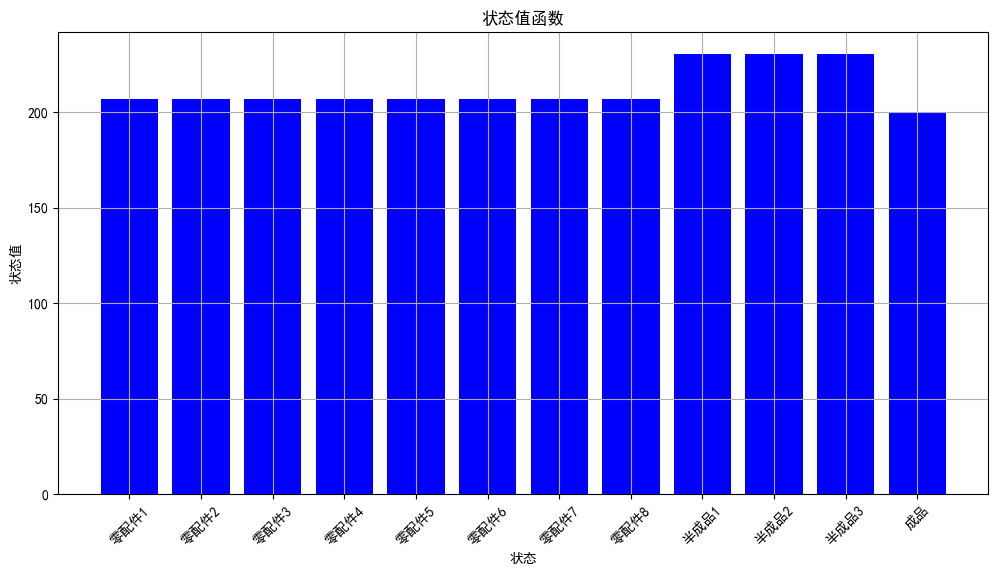

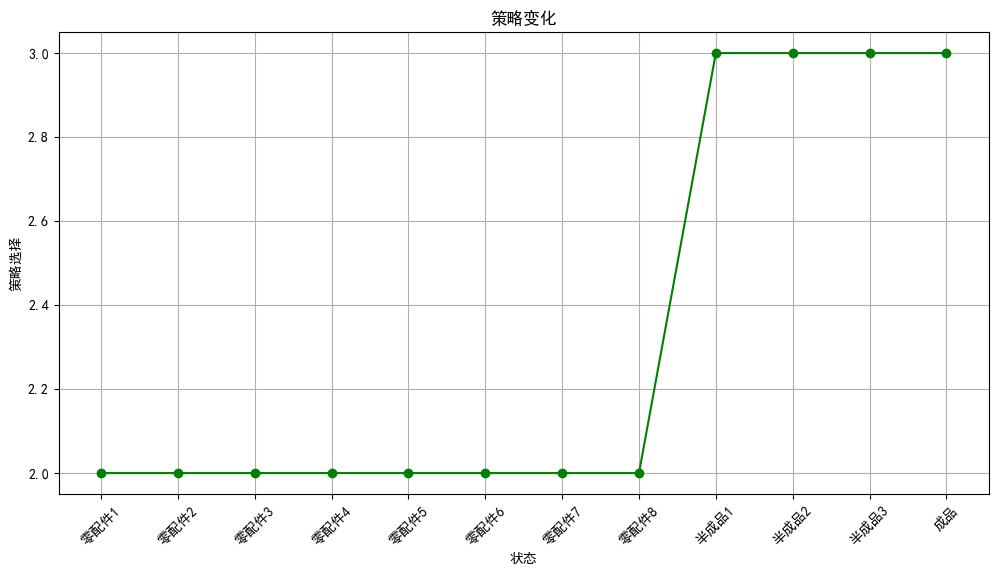

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# 绘制状态值函数
plt.figure(figsize=(12, 6))
plt.bar(states, V, color='blue')
plt.xlabel('状态')
plt.ylabel('状态值')
plt.title('状态值函数')
plt.xticks(rotation=45)  # 如果状态名称过长，可旋转以便显示
plt.grid(True)
plt.show()

# 绘制策略变化
plt.figure(figsize=(12, 6))
plt.plot(states, policy, 'o-', color='green')
plt.xlabel('状态')
plt.ylabel('策略选择')
plt.title('策略变化')
plt.xticks(rotation=45)  # 如果状态名称过长，可旋转以便显示
plt.grid(True)
plt.show()


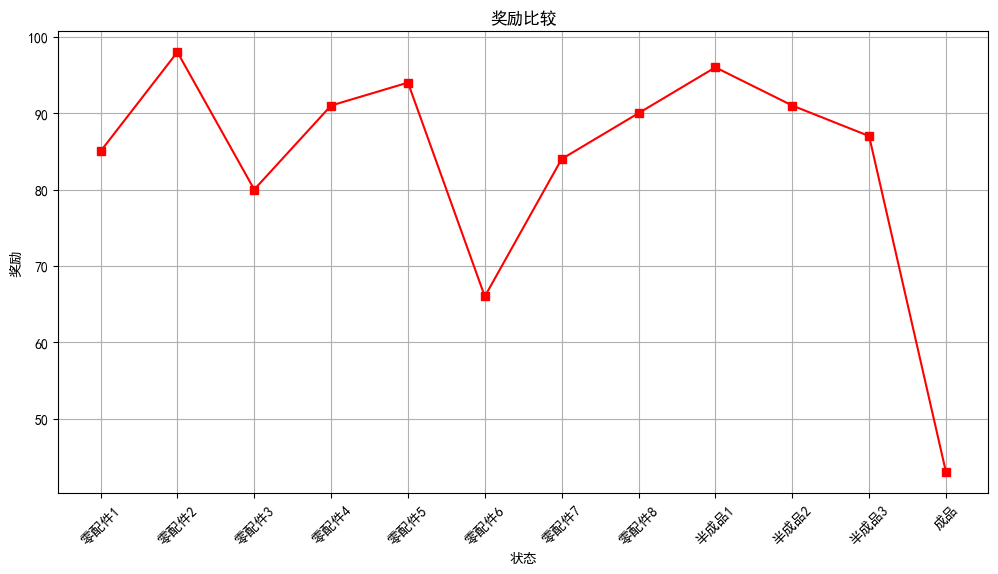

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 定义状态和动作
states = ['零配件1', '零配件2', '零配件3', '零配件4', '零配件5', '零配件6', '零配件7', '零配件8',
          '半成品1', '半成品2', '半成品3', '成品']
actions = ['检测', '不检测', '装配', '销售', '拆解']

# 奖励矩阵初始化
num_states = len(states)
num_actions = len(actions)
R = np.random.randint(-20, 100, size=(num_states, num_actions))  # 随机生成奖励矩阵作为示例

# 状态转移概率矩阵初始化
P = np.zeros((num_actions, num_states, num_states))  

# 简单的状态转移概率和奖励矩阵设置，具体应根据模型调整
# 每个动作只影响到下一个状态
for i in range(num_actions):
    np.fill_diagonal(P[i], 1)

# 价值迭代求解最优策略
def value_iteration(P, R, gamma=0.95, epsilon=0.01):
    V = np.zeros(num_states)
    policy = np.zeros(num_states, dtype=int)
    while True:
        V_prev = np.copy(V)
        for s in range(num_states):
            Q = np.zeros(num_actions)
            for a in range(num_actions):
                Q[a] = R[s, a] + gamma * sum([P[a, s, sp] * V[sp] for sp in range(num_states)])
            V[s] = np.max(Q)
            policy[s] = np.argmax(Q)
        if np.max(np.abs(V - V_prev)) < epsilon:
            break
    return policy, V

policy, V = value_iteration(P, R)

# 提取每个状态在其最优策略下的奖励
rewards = [R[i][policy[i]] for i in range(len(states))]

# 绘制奖励比较图
plt.figure(figsize=(12, 6))
plt.plot(states, rewards, 's-', color='red')
plt.xlabel('状态')
plt.ylabel('奖励')
plt.title('奖励比较')
plt.xticks(rotation=45)  # 旋转以便显示
plt.grid(True)
plt.show()


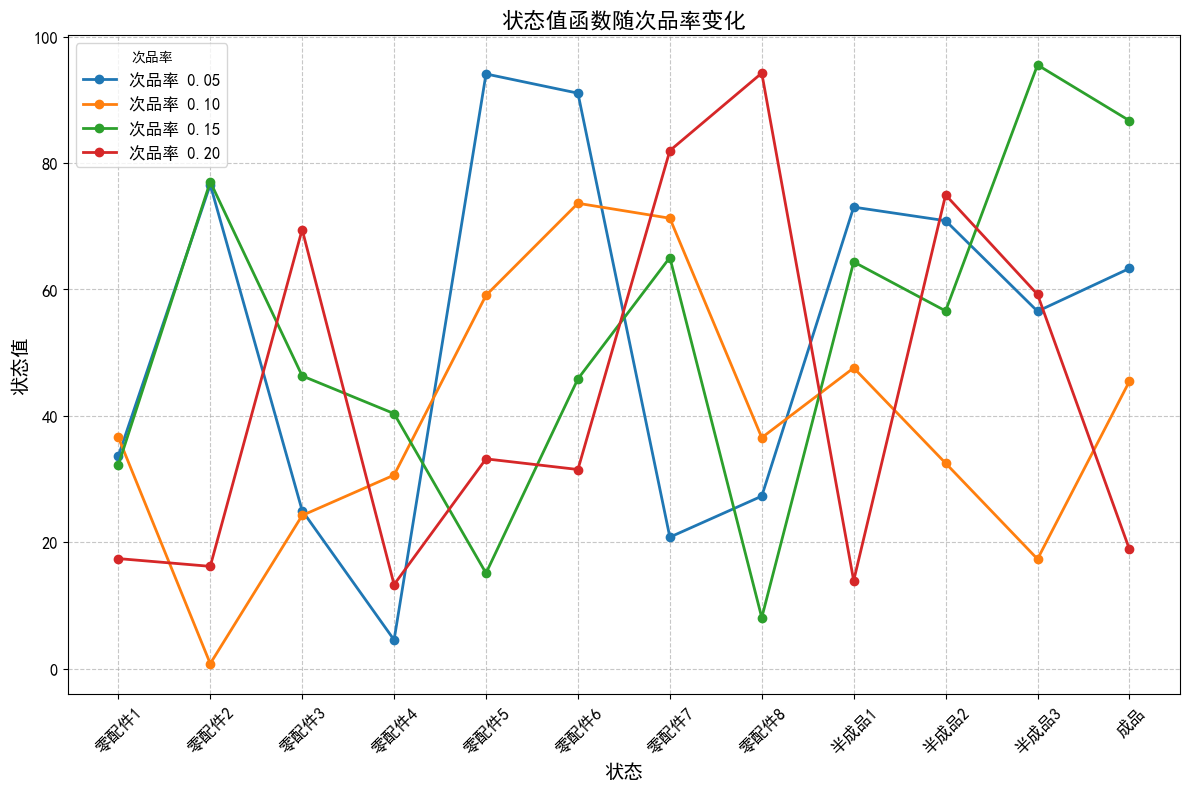

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 模拟的状态和次品率变化
states = ['零配件1', '零配件2', '零配件3', '零配件4', '零配件5', '零配件6', '零配件7', '零配件8',
          '半成品1', '半成品2', '半成品3', '成品']
defect_rates = np.linspace(0.05, 0.2, 4)  # 从5%到20%的次品率变化

# 假设价值函数随次品率变化
value_functions = {rate: np.random.rand(len(states)) * 100 for rate in defect_rates}

# 绘制灵敏度分析结果
plt.figure(figsize=(12, 8))
for rate, values in value_functions.items():
    plt.plot(states, values, marker='o', linestyle='-', linewidth=2, label=f'次品率 {rate:.2f}')

plt.title('状态值函数随次品率变化', fontsize=16, fontweight='bold')
plt.xlabel('状态', fontsize=14, fontweight='bold')
plt.ylabel('状态值', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title="次品率", fontsize=12)
plt.tight_layout()
plt.show()
